# Advanced plots


In [1]:
%config InlineBackend.close_figures=False
%matplotlib inline
from matplotlib import interactive
interactive(False)

from sur import *
setup_database()

m = Mixture()
m.add_many("methane co2 n-decane", "0.25 0.50 0.25")


In [2]:
s1 = EosSetup.objects.create(eos='RKPR', kij_mode=EosSetup.CONSTANTS, lij_mode=EosSetup.CONSTANTS)
s1.set_interaction('kij', 'methane', 'co2', .1)
s1.set_interaction('kij', 'co2', 'n-decane',  0.091)
s1.set_interaction('lij', 'co2', 'n-decane',  -0.90)
env1 = m.get_envelope(s1, label="Envelope 1")

In [3]:
s2 = EosSetup.objects.create(eos='RKPR', kij_mode=EosSetup.CONSTANTS, lij_mode=EosSetup.CONSTANTS)
s2.set_interaction('kij', 'methane', 'co2', .11)
s2.set_interaction('kij', 'co2', 'n-decane',  0.081)
s2.set_interaction('lij', 'co2', 'n-decane',  -0.93)
env2 = m.get_envelope(s2, label="Envelope 2")

In [4]:
from sur.plots import multiplot

In [6]:
fig = multiplot([env1, env2], legends='best')

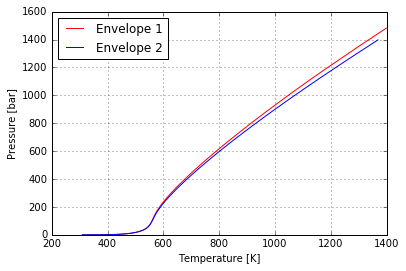

In [7]:
fig

You can use the `bbox_to_anchor` keyword argument to place the legend partially outside the axes and/or decrease the font size. 

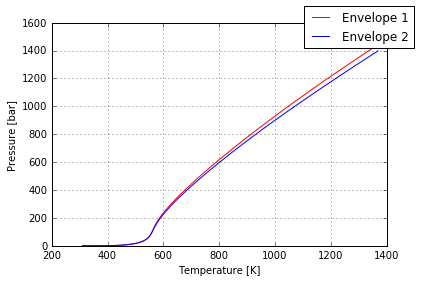

In [8]:
ax = fig.get_axes()[0]
ax.legend(bbox_to_anchor=(1.1, 1.1))
fig

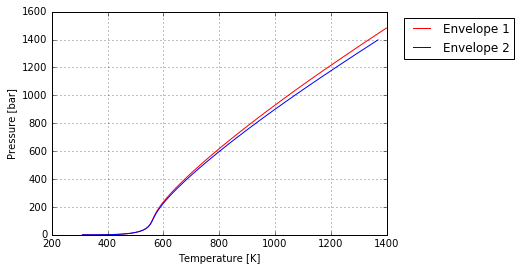

In [9]:
ax.legend(bbox_to_anchor=(1.4, 1))
fig

Similarly, you can make the legend more horizontal and/or put it at the top of the figure (I'm also turning on rounded corners and a simple drop shadow):

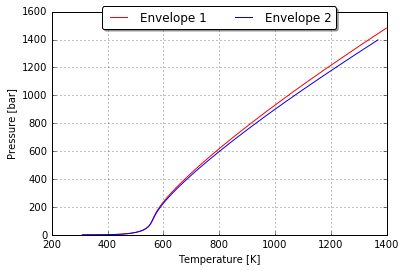

In [10]:
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

fig

Alternatively, you can shrink the current plot's width, and put the legend entirely outside the axis of the figure

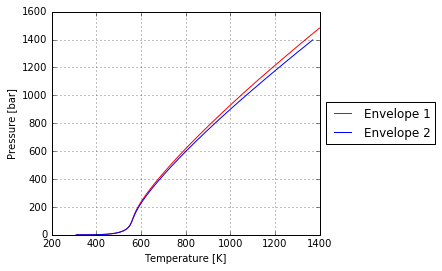

In [11]:
# Shink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig

And in a similar manner, you can shrink the plot vertically, and put the a horizontal legend at the bottom

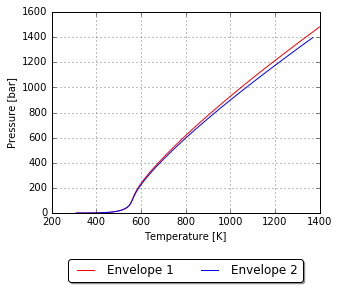

In [12]:
# Shink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
fig

## Configure fonts

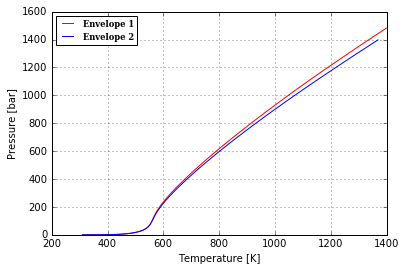

In [13]:
# reset figure
fig = multiplot([env1, env2], legends='upper right')
ax = fig.get_axes()[0]

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
fontP.set_family('serif')
fontP.set_weight('bold')

ax.legend(loc='best', prop=fontP)
fig